In [3]:
push!(LOAD_PATH, "../src");
push!(LOAD_PATH, "src");
push!(LOAD_PATH, ENV["probcomp"]*"/Gen-Distribution-Zoo/src");
# include("../src/pose.jl")

In [ ]:
using Geometry: Segment, segments
using Localization: Pose, Control

In [11]:
#nbx --fname=src/data_helper.jl

import JSON
using Colors, Plots
col = palette(:default);

In [12]:
#nbx
"""
    _segs, _boxes, _paths = load_env(fname)
"""
function load_env(fname)
    d = JSON.parsefile(fname)
    verts    = Vector{Vector{Float64}}(d["verts"]);
    clutter  = Vector{Vector{Vector{Float64}}}(d["clutter_verts"]);
    _paths  = Vector{Vector{Vector{Float64}}}(d["paths"]);
    
    _segs   = segments(verts);
    _boxes  = vcat(segments.(clutter)...);

    return _segs, _boxes, _paths
end

load_env (generic function with 1 method)

In [13]:
#nbx
"""
    _ps, _us = unpack_path(path)
"""
function unpack_path(path)
    xs = path

    # Unpack path into 
    # poses and controls
    _dxs  = xs[2:end] - xs[1:end-1]
    _hds  = angle.(_dxs)
    _dhds = _hds[2:end] - _hds[1:end-1];
    _xs   = xs[1:end-2]; 

    _ps = [Pose(x,hd) for (x,hd) in zip(_xs, _hds)];
    _us = [Control(dx,dhd) for (dx,dhd) in zip(_dxs, _dhds)]

    _T  = length(_xs);

    return _ps, _us
end

unpack_path (generic function with 1 method)

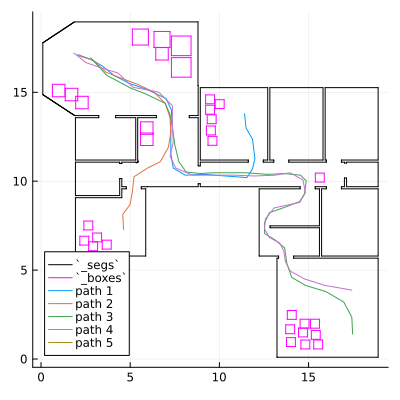

In [19]:
fname = "../data/task_inputs/test_env_1.json"
_segs, _boxes, _paths = load_env(fname)

# ----------------
mypl = plot(size=(400,400), aspect_ration=:equal)
plot!(_segs, c=:black, label="`_segs`")
plot!(_boxes, c=:magenta, label="`_boxes`")
for (i,xs) in enumerate(_paths)
    plot!(xs, c=col[i], label="path $i")
end

mypl

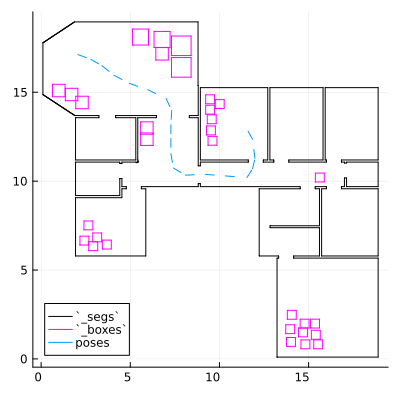

In [18]:
_ps, _us = unpack_path(_paths[1])

# ----------------
mypl = plot(size=(400,400), aspect_ration=:equal)
plot!(_segs, c=:black, label="`_segs`")
plot!(_boxes, c=:magenta, label="`_boxes`")
plot!(_ps, c=col[1], label="poses")

mypl